# MODELIN FINE-TUNE AŞAMASI

**BERT VE DISTILBERT MODELLERİ İÇİN KULLANILAN KÜTÜPHANELER VE MODÜLLER**

In [ ]:
!pip3 install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 36.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 64.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 23.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.41.3-py3-none-any.whl size=25316960 sha256=4b68764ba8b0bee9e2c68bebf0edcd2923b0f17991614fcf0981fc1b3f03ac0c
  Stored in directory: /root/.cache/pip/wheels/fc/76/11/5b953090eebf531f660948a30cd26e70260619f6480f186a5a
  Created wheel for keras_bert: filename=

In [ ]:
pip install transformers==4.37.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 26.5 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.0
    Uninstalling transformers-4.41.0:
      Successfully uninstalled transformers-4.41.0


In [ ]:
import ktrain
from ktrain import text

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

**FINE-TUNE DATASININ İMPORT EDİLMESİ**

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ekman_dataset/train_ekmann.csv")

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43410 entries, 0 to 43409
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     43410 non-null  object
 1   Emotion  43410 non-null  object
 2   Id       43410 non-null  object
dtypes: object(3)
memory usage: 1017.5+ KB


**Data önhazırlık işlemleri**

In [ ]:
l = ["Id"]

In [ ]:
train_df.drop(l, axis =1, inplace= True)

In [ ]:
#DataFrame'i eğitim ve doğrulama (validation) setlerine ayırmak için
x_train, x_val, y_train, y_val = train_test_split(train_df['Text'], train_df['Emotion'], shuffle=True, test_size = 0.2, random_state=42, stratify=train_df['Emotion'])

In [ ]:
#ktrain kütüphanenisinin text modülünü kullanarak bir metin sınıflandırma modeli oluşturur.DistilBERT modelini kullanarak metin verilerini sınıflandırmak için bir transformer modeli hazırlar.
MODEL_NAME = 'distilbert-base-uncased'
t = text.Transformer(MODEL_NAME, maxlen=128, class_names=['joy','neutral','surprise','anger', 'sadness', 'disgust','fear'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
#pandas dataframe'lerini pandas numpy dizisine dönüştürür.
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)

In [ ]:
#ktrain kütüphanesinin text modülünü kullanarak metin verilerini eğitim ve doğrulama setlerine uygun şekilde ön işler.
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_val, y_val)

preprocessing train...
language: en
train sequence lengths:
	mean : 13
	95percentile : 24
	99percentile : 27


/usr/local/lib/python3.10/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 13
	95percentile : 24
	99percentile : 27


In [ ]:
#ktrain kütüphanesinin text modülünü kullanarak bir sınıflandırma modeli oluşturur.
model = t.get_classifier()

In [ ]:
#ktrain kütüphanesini kullanarak bir learner nesnesi oluşturur. Bu nesne, eğitim sürecini yönetir ve modelin eğitim ve değerlendirme işlemlerini gerçekleştirir.
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=32)

In [ ]:
#En uygun learning rate'i bulmak için kullanılır
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
1085/1085 [==============================] - 440s 386ms/step - loss: 1.4605 - accuracy: 0.4556
Epoch 2/1024
1085/1085 [==============================] - 297s 274ms/step - loss: 1.7378 - accuracy: 0.3469


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


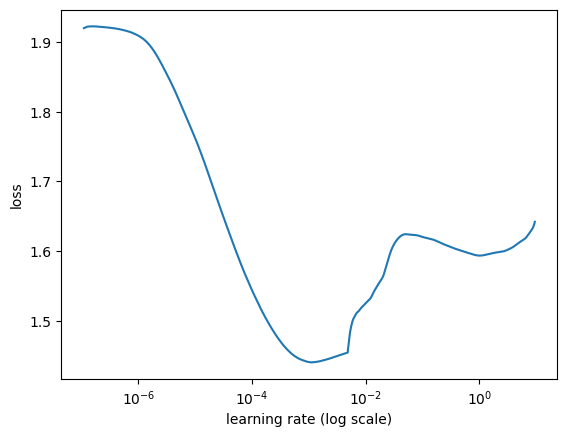

In [ ]:
learner.lr_plot()

In [ ]:
#Distilbert modelinin verilen data ile fine-tuning işlemini gerçekleştirir
#learner.fit_onecycle(1e-4, 5)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
1086/1086 [==============================] - 241s 205ms/step - loss: 1.0408 - accuracy: 0.6133 - val_loss: 0.8735 - val_accuracy: 0.6707
Epoch 2/5
1086/1086 [==============================] - 222s 204ms/step - loss: 0.8239 - accuracy: 0.6938 - val_loss: 0.8939 - val_accuracy: 0.6718
Epoch 3/5
1086/1086 [==============================] - 223s 204ms/step - loss: 0.6987 - accuracy: 0.7402 - val_loss: 0.9518 - val_accuracy: 0.6617
Epoch 4/5
1086/1086 [==============================] - 222s 204ms/step - loss: 0.4187 - accuracy: 0.8493 - val_loss: 1.1083 - val_accuracy: 0.6478
Epoch 5/5
1086/1086 [==============================] - 221s 204ms/step - loss: 0.1579 - accuracy: 0.9478 - val_loss: 1.4428 - val_accuracy: 0.6477


In [ ]:
#ekman datasının kategorileri
train_names = ['joy','neutral','surprise','anger', 'sadness', 'disgust','fear']

In [ ]:
#Fine-tune edilmiş modeli Google Drive üzerine kaydeder.
#ktrain.get_predictor(model, t).save('/content/drive/MyDrive/Colab Notebooks/distilbert_ekman_model')

# KAYDEDİLEN MODELİN YÜKLENMESİ

In [ ]:
#Google Drive üzerinden kaydedilmiş modeli yükler.
model = ktrain.load_predictor('/content/drive/MyDrive/Colab Notebooks/distilbert_ekman_model').model

In [ ]:
#Modelin tahmin işlemini gerçekleştirmesi için learner nesnesine yükler.
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=32)

In [ ]:
#learner nesnesini kullanarak predictor oluşturur.
predictor = ktrain.get_predictor(learner.model, t)

In [ ]:
#klasların doğruluğunun kontrolünü sağlar.
predictor.get_classes()

['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']

In [ ]:
#Modelin raporlarını gerçekleştirmek için belirtilen modül eklenir.
from sklearn.metrics import classification_report

In [ ]:
#Modelin sonuçlarını kontrol etmek için en başta belirlenen validation datası ile kontrolü sağlanır.
predictions = predictor.predict(x_val)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Sınıflandırma raporu
print(classification_report(y_val, predictions, target_names=t.get_classes()))

# Accuracy hesaplama
accuracy = accuracy_score(y_val, predictions)
print("Accuracy:", accuracy)


              precision    recall  f1-score   support

       anger       0.47      0.49      0.48       859
     disgust       0.43      0.41      0.42       154
        fear       0.50      0.59      0.54       112
         joy       0.77      0.81      0.79      3243
     neutral       0.63      0.56      0.59      2629
     sadness       0.56      0.55      0.55       612
    surprise       0.56      0.60      0.58      1073

    accuracy                           0.65      8682
   macro avg       0.56      0.57      0.56      8682
weighted avg       0.65      0.65      0.65      8682

Accuracy: 0.6476618290716425


# Eğitilmiş Model ile kategorilendirilmemiş datanın duygu analizi

In [ ]:
#Youtube üzerinden çekilen ve istenilen formatta temizlenen metin verisi
cleaned_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cleaned_data/cleaned_2sora_cleaned_2.csv")

In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29784 entries, 0 to 29783
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    29784 non-null  object
dtypes: object(1)
memory usage: 232.8+ KB


In [ ]:
#Pandas Dataframe'ni istenilen tuple to tuple formatına dönüştüren fonksiyon
def pddf_to_list(text):
    text = str(text)
    return text

In [ ]:
cleaned_data = [pddf_to_list(text) for text in cleaned_data['text']]

In [ ]:
#Duygu analizinin yapılması
youtube_predictions = predictor.predict(cleaned_data)

In [ ]:
youtube_predictions

['joy',
 'surprise',
 'neutral',
 'neutral',
 'joy',
 'neutral',
 'sadness',
 'neutral',
 'neutral',
 'joy',
 'surprise',
 'joy',
 'joy',
 'neutral',
 'neutral',
 'surprise',
 'neutral',
 'surprise',
 'neutral',
 'neutral',
 'neutral',
 'joy',
 'joy',
 'joy',
 'neutral',
 'anger',
 'joy',
 'surprise',
 'surprise',
 'fear',
 'neutral',
 'joy',
 'joy',
 'surprise',
 'surprise',
 'neutral',
 'anger',
 'neutral',
 'sadness',
 'joy',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'joy',
 'neutral',
 'neutral',
 'neutral',
 'sadness',
 'joy',
 'neutral',
 'surprise',
 'neutral',
 'joy',
 'joy',
 'neutral',
 'sadness',
 'sadness',
 'neutral',
 'neutral',
 'anger',
 'surprise',
 'neutral',
 'sadness',
 'neutral',
 'surprise',
 'anger',
 'neutral',
 'joy',
 'anger',
 'joy',
 'neutral',
 'surprise',
 'surprise',
 'joy',
 'sadness',
 'joy',
 'neutral',
 'joy',
 'joy',
 'joy',
 'neutral',
 'neutral',
 'neutral',
 'anger',
 'neutral',
 'joy',
 'neutral',
 'ange

In [ ]:
len(youtube_predictions)

29784

# Youtube verisi ile Predict sonuçlarının birleştirilip yeni bir csv dosyasına kaydedilmesi

In [ ]:
result_cleaned_data = pd.DataFrame(cleaned_data)

In [ ]:
result_cleaned_data.columns = ['text']

In [ ]:
result_predictions = pd.DataFrame(youtube_predictions)
result_predictions.columns = ['emotions']

In [ ]:
combined_df = pd.concat([result_cleaned_data, result_predictions], axis=1)
print(combined_df)

                                                    text  emotions
0      let s with creativity one of the last enjoymen...       joy
1                 can we get a remake of the rock eating  surprise
2                                       anyone here from   neutral
3      first one to come up with a genuine biotic ver...   neutral
4      i cant wait for this to be to the public it wi...       joy
...                                                  ...       ...
29779  as an aspiring and artist this is terrifying m...      fear
29780  extraordinary for storyteller and original ide...       joy
29781  or people could look into something that was s...   neutral
29782                            am buy this to generate   neutral
29783  i can finally make my million fi blockbuster m...       joy

[29784 rows x 2 columns]


In [ ]:
combined_df.to_csv('/content/drive/MyDrive/Colab Notebooks/ekman_predicted_data/ekman_predicted_df.csv', index=False)

# Kategorilendirilmiş datanın Sonuç tabloları

In [ ]:
combined_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ekman_predicted_data/ekman_predicted_df.csv')

In [ ]:
# Her kategorinin sayısını yaz
category_counts = combined_df['emotions'].value_counts()
total_count = len(combined_df)

# Sayıları ve yüzdeleri belirtilen formatta yazdır
for label, count in category_counts.items():
    percentage = (count / total_count) * 100
    print(f"{label}: {count} ({percentage:.2f}%)")
    # Toplam veri noktalarının sayısını yazdır

print(f"Total data points: {total_count}")

neutral: 14167 (47.57%)
joy: 8154 (27.38%)
surprise: 3370 (11.31%)
anger: 1750 (5.88%)
fear: 1347 (4.52%)
sadness: 773 (2.60%)
disgust: 223 (0.75%)
Total data points: 29784


In [ ]:

category_counts = combined_df['emotions'].value_counts()
total_count = len(combined_df)

# Sayıları ve yüzdeleri belirtilen formatta yazdır
for label, count in category_counts.items():
    percentage = (count / total_count) * 100
    print(f"{label}: {count} ({percentage:.2f}%)")

# Toplam veri noktalarının sayısını yazdır
print(f"Total data points: {total_count}")

# Sonuçları bir pilot tabloda göster
pilot_table = pd.DataFrame({
    'Category': category_counts.index,
    'Count': category_counts.values,
    'Percentage': (category_counts.values / total_count) * 100
})

print(pilot_table)


neutral: 14167 (47.57%)
joy: 8154 (27.38%)
surprise: 3370 (11.31%)
anger: 1750 (5.88%)
fear: 1347 (4.52%)
sadness: 773 (2.60%)
disgust: 223 (0.75%)
Total data points: 29784
   Category  Count  Percentage
0   neutral  14167   47.565807
1       joy   8154   27.377115
2  surprise   3370   11.314800
3     anger   1750    5.875638
4      fear   1347    4.522562
5   sadness    773    2.595353
6   disgust    223    0.748724


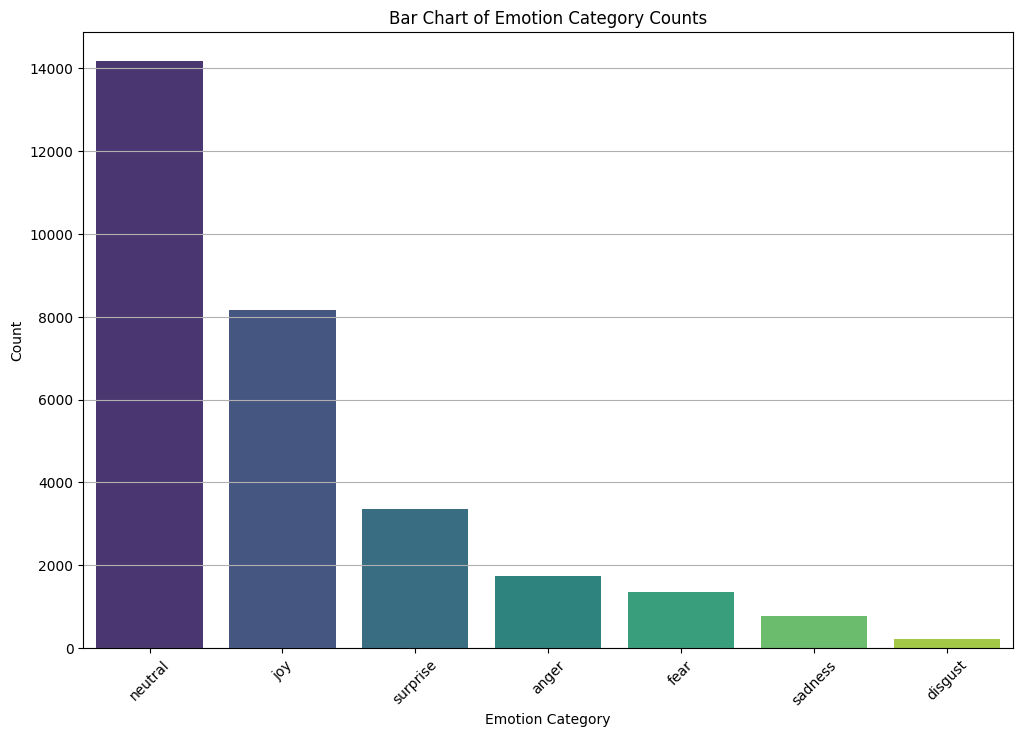

In [ ]:

category_counts = combined_df['emotions'].value_counts()

# Sayımlar için bir DataFrame oluştur
data = {
    'Category': category_counts.index,
    'Count': category_counts.values
}

count_df = pd.DataFrame(data)

# Bar grafiği çiz
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Count', data=count_df, palette='viridis')
plt.title('Bar Chart of Emotion Category Counts')
plt.xlabel('Emotion Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
